1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import os
# import zipfile
import functions as fn

In [2]:
# Path to zip file
zip_file_path = '/Volumes/Windows SD/Master SSE/Semester 2/Fall Detection/DataSet.zip'

# Base path to the dataset folder structure *inside* the zip file
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]


# all_data, all_labels, activity_code_list, adls, falls = fn.read_file(base_path, subject_ids)
all_data, all_labels, activity_code_list, file_name_list, adls, falls = fn.read_zip(zip_file_path, base_path, subject_ids)

print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')
print(f'number of total activity codes: {len(activity_code_list)}')
print(f'number of total file names: {len(file_name_list)}')
print('------------------------------------------')
print(f'number of total ADL data: {len(adls)}')
print(f'number of total Fall data: {len(falls)}')
print('------------------------------------------')
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

# create a dictionary to map activity codes to real-world activities
activity_mapping = {
    "D01": "Walking slowly",
    "D02": "Walking quickly",
    "D03": "Jogging slowly",
    "D04": "Jogging quickly",
    "D05": "Walking upstairs and downstairs slowly",
    "D06": "Walking upstairs and downstairs quickly",
    "D07": "Slowly sit in a half height chair, wait a moment, and up slowly",
    "D08": "Quickly sit in a half height chair, wait a moment, and up quickly",
    "D09": "Slowly sit in a low height chair, wait a moment, and up slowly",
    "D10": "Quickly sit in a low height chair, wait a moment, and up quickly",
    "D11": "Sitting a moment, trying to get up, and collapse into a chair ",
    "D12": "Sitting a moment, lying slowly, wait a moment, and sit again",
    "D13": "Sitting a moment, lying quickly, wait a moment, and sit again",
    "D14": "Being on one's back change to lateral position, wait a moment, and change to one's back",
    "D15": "Standing, slowly bending at knees, and getting up",
    "D16": "Standing, slowly bending without bending knees, and getting up",
    "D17": "Standing, get into a car, remain seated and get out of the car",
    "D18": "Stumble while walking",
    "D19": "Gently jump without falling (trying to reach a high object)",
    "F01": "Fall forward while walking caused by a slip",
    "F02": "Fall backward while walking caused by a slip",
    "F03": "Lateral fall while walking caused by a slip",
    "F04": "Fall forward while walking caused by a trip",
    "F05": "Fall backward while walking caused by a trip",
    "F06": "Vertical fall while walking caused by fainting",
    "F07": "Fall while walking, with use of hands in a table to dampen fall, caused by fainting",
    "F08": "Fall forward when trying to get up",
    "F09": "Lateral fall when trying to get up",
    "F10": "Fall forward when trying to sit down",
    "F11": "Fall backward when trying to sit down",
    "F12": "Lateral fall when trying to sit down",
    "F13": "Fall forward while sitting, caused by fainting or falling asleep",
    "F14": "Fall backward while sitting, caused by fainting or falling asleep",
    "F15": "Lateral fall while sitting, caused by fainting or falling asleep",
}

d01_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D01']
d01_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D01']
d02_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D02']
d02_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D02']
d03_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D03']
d03_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D03']
d04_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D04']
d04_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D04']
d05_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D05']
d05_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D05']
d06_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D06']
d06_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D06']
d07_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D07']
d07_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D07']
d08_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D08']
d08_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D08']
d09_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D09']
d09_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D09']
d10_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D10']
d10_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D10']
d11_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D11']
d11_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D11']
d12_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D12']
d12_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D12']
d13_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D13']
d13_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D13']
d14_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D14']
d14_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D14']
d15_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D15']
d15_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D15']
d16_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D16']
d16_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D16']
d17_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D17']
d17_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D17']
d18_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D18']
d18_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D18']
d19_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D19']
d19_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D19']


Progress: 4505/4505 files processed
Total files processed: 4505 ✅
Total ADL labels: 2707 ✅
Total Fall labels: 1798 ✅
number of total readings: 4505
number of total labels: 4505
number of total activity codes: 4505
number of total file names: 4505
------------------------------------------
number of total ADL data: 2707
number of total Fall data: 1798
------------------------------------------
Unique labels and their counts:
ADL: 2707
Fall: 1798


In [3]:
# print("--------------------------------------")
print("start processing signals")

new_d01_data, d01_file_names, d01_activity_code_list = fn.split_and_add(d01_data, 800, d01_file_names)
new_d02_data, d02_file_names, d02_activity_code_list = fn.split_and_add(d02_data, 800, d02_file_names)
new_d03_data, d03_file_names, d03_activity_code_list = fn.split_and_add(d03_data, 800, d03_file_names)
new_d04_data, d04_file_names, d04_activity_code_list = fn.split_and_add(d04_data, 800, d04_file_names)
print("---------------- D05 ----------------")
new_d05_data = fn.idle_remover(d05_data, 200, 30, mode='gyro')
new_d05_data_1, new_d05_data_2 = fn.split_and_center(new_d05_data, 800)
print("---------------- D06 ----------------")
new_d06_data = fn.idle_remover(d06_data, 150, 30, mode='acc')
new_d06_data_1, new_d06_data_2 = fn.split_and_center(new_d06_data, 800)
print("---------------- D07 ----------------")
# for i in range(len(d07_data)):
#     d07_data[i] = d07_data[i][:, 200:]
new_d07_data_1, new_d07_data_2 = fn.extract_from_high_amp_segments(d07_data, 100, 100, 0.3, 700, 200, 800, "gyro")
print("---------------- D08 ----------------")
new_d08_data_1, new_d08_data_2 = fn.extract_from_high_amp_segments(d08_data, 100, 100, 0.14, 500, 100, 500, "gyro")
print("---------------- D09 ----------------")
new_d09_data_1, new_d09_data_2 = fn.extract_from_high_amp_segments(d09_data, 100, 100, 0.1, 700, 100, 700, "gyro")
print("---------------- D10 ----------------")
new_d10_data_1, new_d10_data_2 = fn.extract_from_high_amp_segments(d10_data, 100, 100, 0.1, 500, 100, 500, "gyro")
print("---------------- D11 ----------------")
new_d11_data = fn.keep_from_peak(d11_data, 400)
print("---------------- D12 ----------------")
new_d12_data_1, new_d12_data_2 = fn.extract_from_high_amp_segments(d12_data, 100, 100, 0.2, 800, 200, 800, "gyro")
print("---------------- D13 ----------------")
new_d13_data_1, new_d13_data_2 = fn.extract_from_high_amp_segments(d13_data, 100, 100, 0.2, 500, 50, 500, "gyro")
print("---------------- D14 ----------------")
new_d14_data_1, new_d14_data_2 = fn.extract_from_high_amp_segments(d14_data, 100, 100, 0.15, 600, 100, 600, "gyro")
print("---------------- D15 ----------------")
new_d15_data_1, new_d15_data_2 = fn.extract_from_high_amp_segments(d15_data, 250, 250, 0.2, 700, 200, 800, "gyro")
print("---------------- D16 ----------------")
new_d16_data_1, new_d16_data_2 = fn.extract_from_high_amp_segments(d16_data, 100, 100, 0.15, 700, 200, 800, "gyro")
print("---------------- D17 ----------------")
for i in range(len(d17_data)):
    d17_data[i] = d17_data[i][:, 300:]
new_d17_data_1, new_d17_data_2 = fn.extract_from_high_amp_segments(d17_data, 300, 300, 0.3, 1000, 200, 1000, "gyro")
print("---------------- D18 ----------------")
new_d18_data = fn.keep_from_peak(d18_data, 400)
print("---------------- D19 ----------------")
new_d19_data_1, new_d19_data_2 = fn.extract_from_high_amp_segments(d19_data, 100, 100, 0.2, 400, 150, 500, "acc")

start processing signals
number of new D01 data: 932 with shape: (932, 6, 800), file_names :932, activities: 932 
number of new D02 data: 964 with shape: (964, 6, 800), file_names :964, activities: 964 
number of new D03 data: 965 with shape: (965, 6, 800), file_names :965, activities: 965 
number of new D04 data: 915 with shape: (915, 6, 800), file_names :915, activities: 915 
---------------- D05 ----------------
190 files processed, Min length: 2800, Max length: 5000
190 files processed, Min length: 800, Max length: 800
190 files processed, Min length: 800, Max length: 800
---------------- D06 ----------------
118 files processed, Min length: 1350, Max length: 2550
118 files processed, Min length: 800, Max length: 800
118 files processed, Min length: 800, Max length: 800
---------------- D07 ----------------
Number of features extracted (f4): 190
190 files processed using scale: 0.3 
Min1: 800, Max1: 800 
Min2: 500, Max2: 800
---------------- D08 ----------------
Number of features 

In [ ]:
fn.length_status(d19_data, new_d19_data_1, new_d19_data_2, 0, 0)

[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500] 
 ---- 
 [500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500 500 500 500 500 500 500 500 500 500 500]

indices of lis

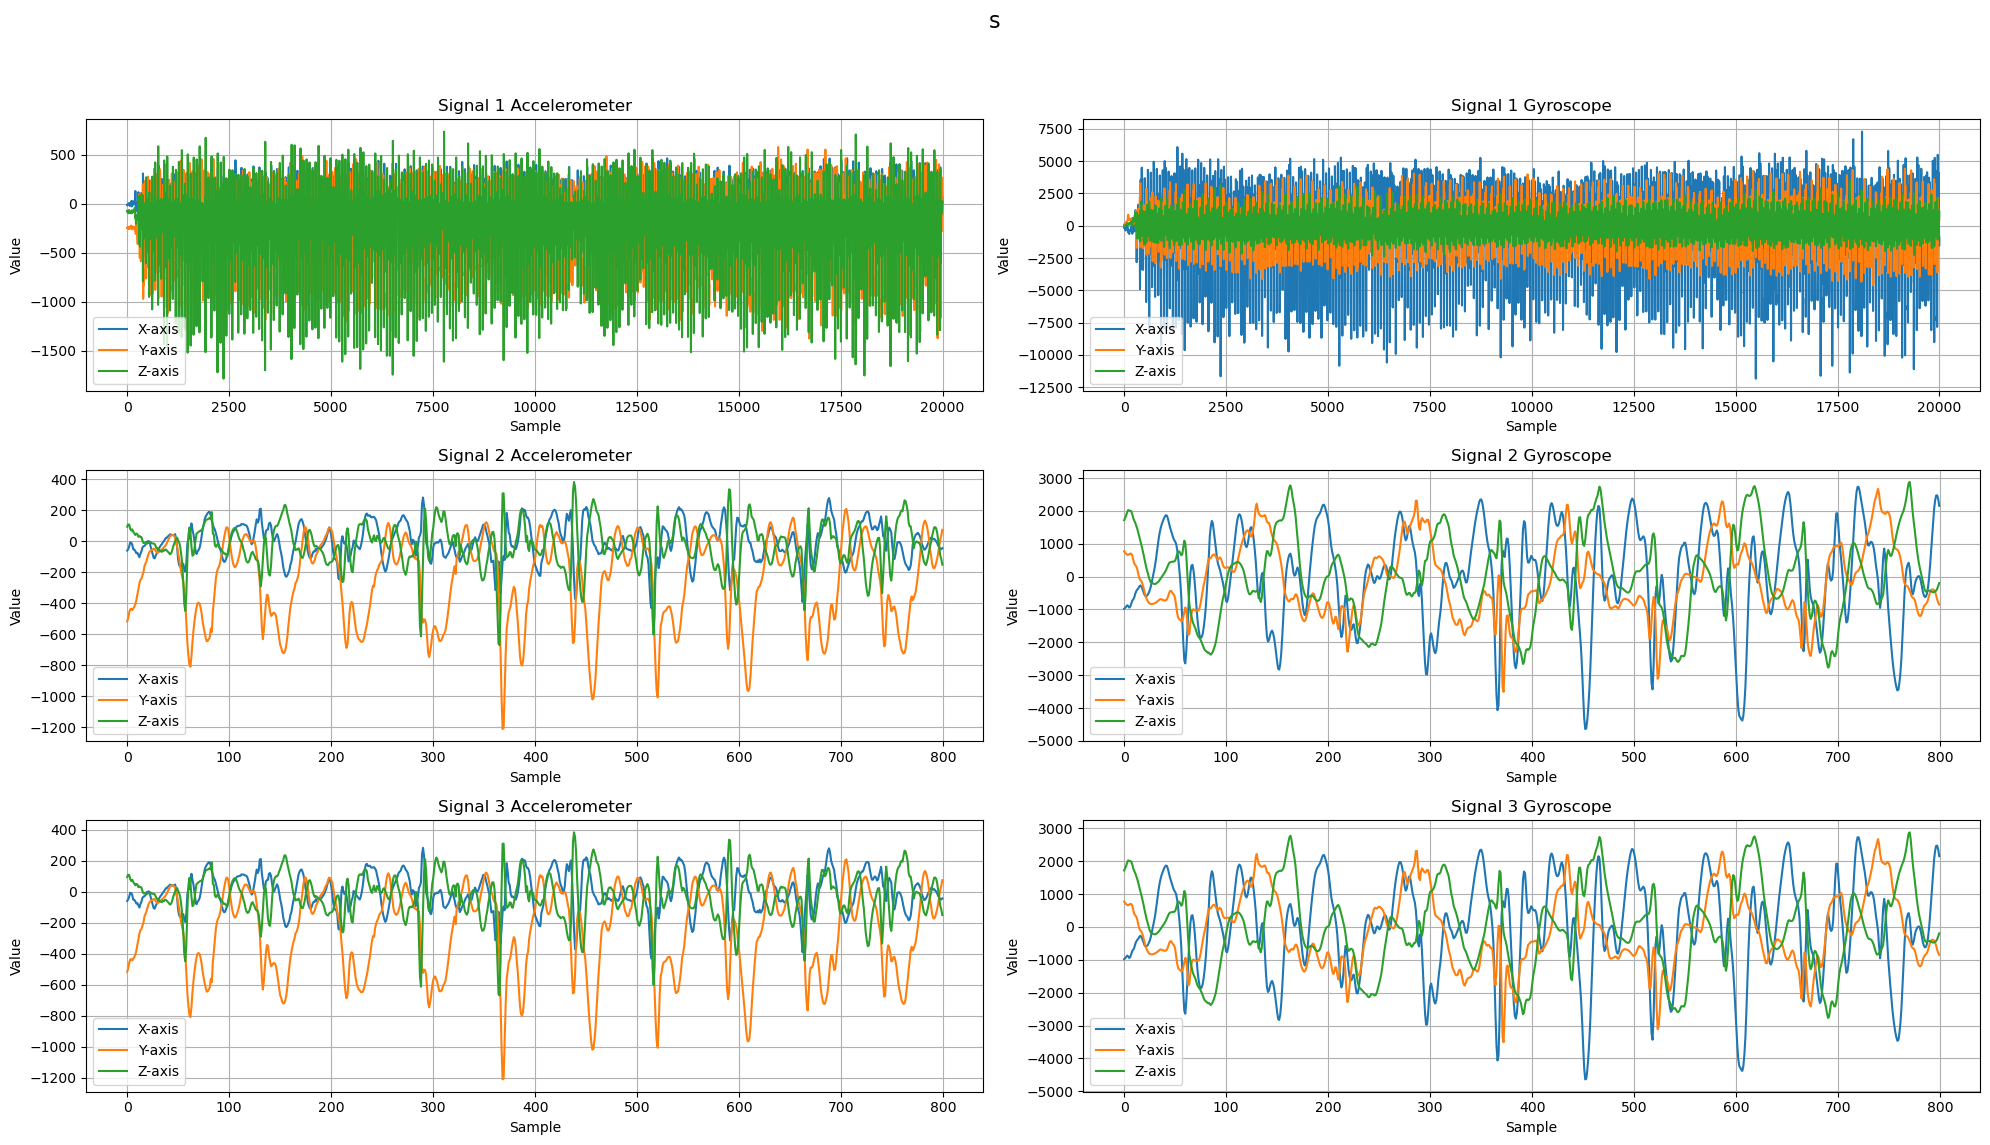

In [11]:
i = 35
fn.plot_signals([d04_data[i], new_d04_data[i], new_d04_data[i+10]], "s", "both")

# check and make all signal lists equal